# Task 1: To Explore Supervised Machine Learning 

### Using Linear Regression to predict the precentage of marks that a student is expected to score based upon the no.of hours they studied.

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing the dataset

url = "http://bit.ly/w-data"
df = pd.read_csv(url)


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# To find the no.of rows and columns
print(df.shape)
print()

# To print datatypes 
print(df.dtypes)
print()

# To print the summary
print(df.describe())

(25, 2)

Hours     float64
Scores      int64
dtype: object

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


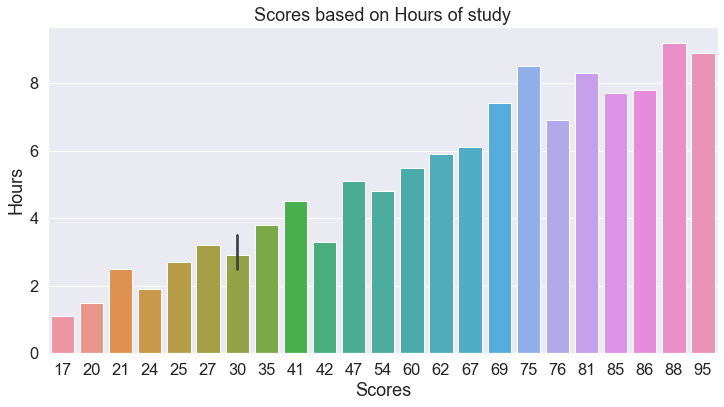

In [5]:
plt.figure(figsize = (12,6))
sns.set(font_scale=1.5)
sns.barplot(x=df['Scores'],y=df['Hours'])
plt.xlabel("Scores", fontsize=18);
plt.ylabel("Hours", fontsize=18);
plt.title("Scores based on Hours of study");
plt.show()

### Data Preprocessing

In [6]:
# To find missing values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

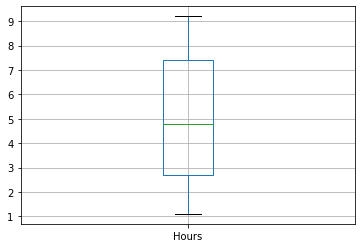

In [7]:
# Finding outliers

df.boxplot(column="Hours")

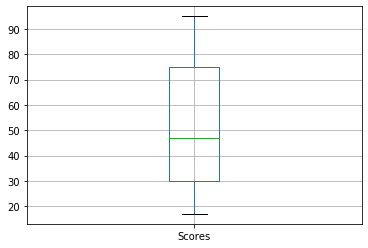

In [8]:
df.boxplot(column="Scores")

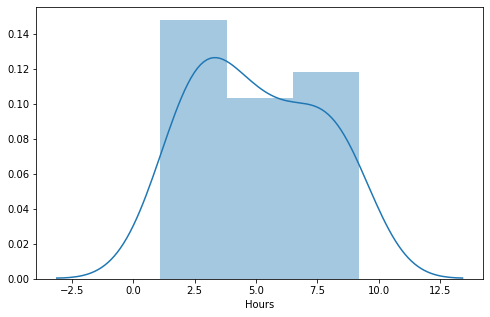

In [9]:
# To check the normality

plt.figure(figsize = (8,5))
sns.distplot(df.Hours)

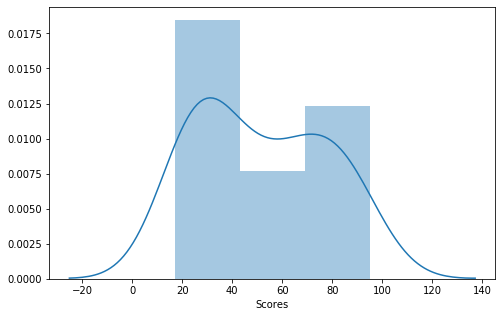

In [10]:
plt.figure(figsize = (8,5))
sns.distplot(df.Scores)

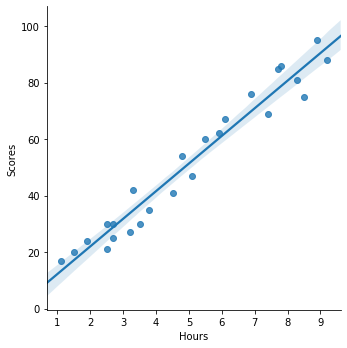

In [11]:
# To check linearity

sns.pairplot(df, x_vars=["Hours"], y_vars=["Scores"], kind='reg', height=5)

### Preparing the data


In [12]:
X=df.values[:,:-1]
Y=df.values[:,-1]

### Splitting the data


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

### Model Building

In [14]:
from sklearn.linear_model import LinearRegression

# create the model
lm = LinearRegression()

# Fit the model
lm.fit(X_train,Y_train)

# Print intercept and coefficients

print(lm.intercept_)
print(lm.coef_)

1.932204253151646
[9.94167834]


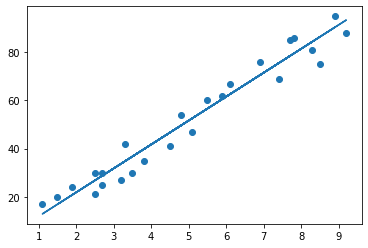

In [15]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Predicting Values


In [16]:
Y_pred=lm.predict(X_test)
print(Y_pred)


[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [17]:
# Creating a new dataframe and storing the Actual and Predicted values
new_df = pd.DataFrame()

new_df['Actual values']=Y_test
new_df['Predicted values']=Y_pred

new_df

,Actual values,Predicted values
0,20.0,16.844722
1,27.0,33.745575
2,69.0,75.500624
3,30.0,26.786400
4,62.0,60.588106
5,35.0,39.710582
6,24.0,20.821393


### Plotting the predicted values

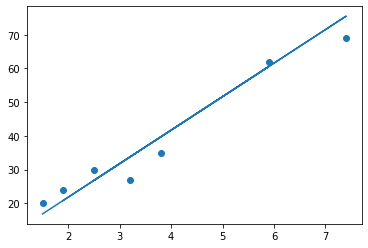

In [18]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred)
plt.show()

### Predicting the Score for 9.25 Hours

In [19]:
own_pred = lm.predict([[9.25]])
print("No of Hours = {}".format([[9.25]]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341655


### Model Evaluation

In [20]:
from sklearn import metrics  
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred)) 
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE: 4.130879918502486
MSE: 20.33292367497997
RMSE: 4.5092043283688055
